***
# 소개


* 이 장에서 살펴볼 확률변수는 **서로 독립인 다차원 확률변수**.
* 독립: 확률변수가 다른 확률변수에 영향을 끼치지 않음.


* **독립동일분포**(**i.i.d.**; independently and identically distributed): **서로 독립**이고 각각 **동일한 확률분포**를 따르는 다차원 확률변수.
    * 동일한 조건 아래에서 수행되는 실험이나 관측을 여러 번 반복하여 데이터를 얻는 것.
    * 예: 우연히 만난 20명의 학생에게 시험 점수를 물어본 경우,
    * 학생 한 명의 점수 각각은 전교생의 점수 분포를 따르는 **1차원 확률변수**,
    * 어떤 학생을 만나기 직전에 만났던 학생과 전혀 관계없이 만난 학생이므로,
    * 우연히 만난 20명의 점수는 **서로 독립인 20차원의 확률변수** (독립동일분포).
    * 확률분포 $F$: $X_1, X_2, ..., X_{20} \sim F$.

***
# 9.1. 독립성(Independence)


## 9.1.1. 독립성의 정의


* n 개의 확률변수 $X_1, X_2, ..., X_n$이 다음을 만족할 때, $X_1, X_2, ..., X_n$은 서로 독립.

$$f_{X_1, X_2, ..., X_n}(x_1, x_2, ..., x_n) = f_{X_1}(x_1)f_{X_2}(x_2)...f_{X_n}(x_n)$$

## 9.1.2. 독립성과 무상관성


* 공분산, 상관계수: 두 확률변수의 관계성을 나타내는 지표.
    * 무상관: 공분산 또는 상관계수가 0 (두 확률변수 사이에 상관성, 선형 관계가 없음).


* X와 Y가 **독립**일 때 X와 Y는 **무상관**이 되지만, X와 Y가 **무상관**일 때 무상관일 때 X와 Y가 반드시 **독립**인 것은 아님.

***
# 9.2. 합(sum)의 분포


* 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1, X_2, ..., X_n$의 합.
* $\sum_{i=1}^n X_i = X_1 + X_2 + ... + X_n$이 따르는 확률분포.


* 합의 분포 **기댓값**
    * 합의 분포 기댓값은 각 확률변수 **기댓값의 합**.

$$E(X_1 + X_2 + ... + X_n) = E(X_1) + E(X_2) + ... + E(X_n)$$


* 합의 분포 **분산**
    * 확률변수 $X_1, X_2, ..., X_n$이 서로 독립이라면,

$$V(X_1 + X_2 + ... + X_n) = V(X_1) + V(X_2) + ... + V(X_n)$$

***
## 9.2.1. 정규분포의 합의 분포


* 정규분포의 합도 정규분포가 됨.

* **재생성**(**Reproductive property**): 동일한 분포를 따르는 2 개의 독립인 확률변수에 대해 그 합도 동일한 확률분포가 되는 성질.
    * 모든 확률분포가 재생성을 갖는 것은 아님!

In [1]:
import numpy as np
from scipy import stats


rv1 = stats.norm(1, np.sqrt(2)) # 평균이 1, 분산이 2인 정규분포
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)

X_sample = rv1.rvs(size = sample_size) # Random variates
Y_sample = rv2.rvs(size = sample_size)

sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(2.999817833285941, 4.996684511489425)

In [2]:
import matplotlib.pyplot as plt


fig, sub = plt.subplots(figsize = (10, 6))

rv = stats.norm(3, np.sqrt(5))

xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100) # Inverse survival function

sub.hist(sum_sample, bins = 100, density = True, alpha = 0.5, label = "N(1, 2) + N(2, 3)")
sub.plot(xs, rv.pdf(xs), c = "grey", label = "N(3, 5)")
sub.plot(xs, rv1.pdf(xs), c = "grey", ls = "--", label = "N(1, 2)")
sub.plot(xs, rv2.pdf(xs), c = "grey", ls = ":", label = "N(2, 3)")

sub.legend()

sub.set_xlim(xs.min(), xs.max())

plt.show()

<Figure size 1000x600 with 1 Axes>

* 서로 독립인 확률변수 $X_1 \sim N(\mu_1, {\sigma_1}^2), X_2 \sim N(\mu_2, {\sigma_2}^2), ..., X_n \sim N(\mu_n, {\sigma_n}^2)$에 관해서,

$$\sum_{i=1}^n X_i \sim N \left( \sum_{i=1}^n \mu_i, \sum_{i=1}^n {\sigma_i}^2 \right)$$

***
## 9.2.2. 포아송 분포의 합의 분포


* **재생성**.
* 서로 독립인 확률변수 $X_1 \sim Poi(\lambda_1), X_2 \sim Poi(\lambda_2), ..., X_n \sim Poi(\lambda_n)$에 관해서,

$$\sum_{i=1}^n X_i \sim Poi \left( \sum_{i=1}^n \lambda_i \right)$$

In [3]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)

X_sample = rv1.rvs(size = sample_size)
Y_sample = rv2.rvs(size = sample_size)

sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(6.996251, 6.995186944999001)

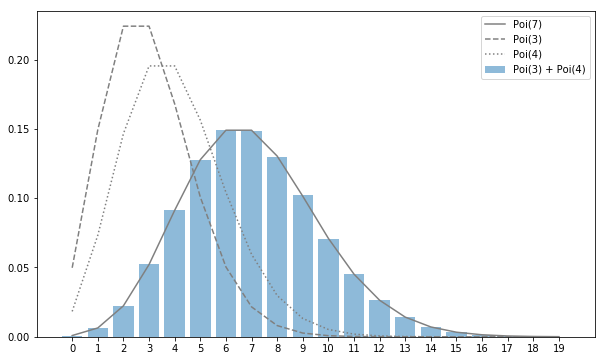

In [4]:
fig, sub = plt.subplots(figsize = (10, 6))

rv = stats.poisson(7)

xs = np.arange(20)

hist, _ = np.histogram(sum_sample, bins = 20, range = (0, 20), normed = True)

sub.bar(xs, hist, alpha = 0.5, label = "Poi(3) + Poi(4)")
sub.plot(xs, rv.pmf(xs), c = "grey", label = "Poi(7)")
sub.plot(xs, rv1.pmf(xs), c = "grey", ls = "--", label = "Poi(3)")
sub.plot(xs, rv2.pmf(xs), c = "grey", ls = ":", label = "Poi(4)")

sub.legend()

sub.set_xticks(xs)

plt.show()

***
## 9.2.3. 베르누이 분포의 합의 분포


* **재생성 X**.
* 베르누이 분포의 합은 **이항분포**가 됨.
* $X_1, X_2, ..., X_n \sim Bern(p)$에 관해서,

$$\sum_{i=1}^n X_i \sim Bin(n, p)$$

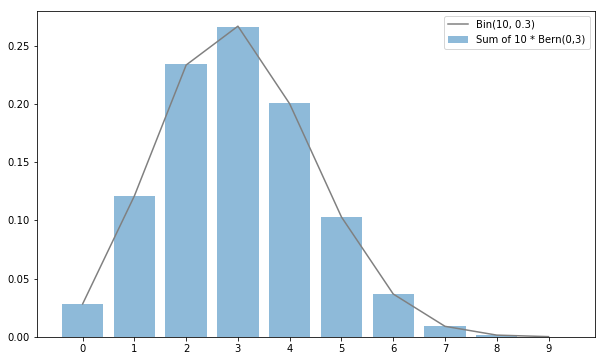

In [5]:
fig, sub = plt.subplots(figsize = (10, 6))

rv1 = stats.bernoulli(0.3)

sample_size = int(1e6)

Xs_sample = rv1.rvs((10, sample_size))

sum_sample = np.sum(Xs_sample, axis = 0)

rv = stats.binom(10, 0.3) # n = 10, p = 0.3

xs = np.arange(10)

hist, _ = np.histogram(sum_sample, bins = 10, range = (0, 10), normed = True)

sub.bar(xs, hist, alpha = 0.5, label = "Sum of 10 * Bern(0,3)")
sub.plot(xs, rv.pmf(xs), c = "grey", label = "Bin(10, 0.3)")

sub.legend()

sub.set_xticks(xs)

plt.show()